In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi_a
import quandl as tradeapi_q
from pycoingecko import CoinGeckoAPI

from MCForecastTools import MCSimulation

%matplotlib inline

#So the sole purpose of this project that we devised is
#to show how New Alt Horizon will beat the S&P 500 benchmark, and we have to show it through visualizations.
#New Alt Horizon is something we created and made up so that we pool API for Cryptos, the Nasdaq index, the S&P 500
#how will the ALT Horizon outperform the current TSP(Thrift Savings Plan)


Bad key "text.kerning_factor" on line 4 in
C:\Users\tbder\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
##Thomas Changes

#Changed dataframe from 5 years to 4, Alpacas only lets you take 1000 days at once, so this was neccesary.
#Removed unneccesary data cleaning and combined certain blocks to make program more readable and effecient.
#Fixed our baseline C-Fund data to contain more than just the top 10 stocks in the fund, now essentially mirrors the fund perfectly.
#Completed full simulations for cfund, conservative, medium and risk.
#Added graphs for each fund showing their components (except cfund which I treat as a single entity for effeciency purposes)
#Added conclusive graphs showing the median returns for all funds together

##What is left
#To create a readable interface if we wish.
#Possible effeciency issues?
#Longer MCsimulations? (currently we only do 5 years)

In [3]:
#!pip install alpaca_trade_api
#!pip install quandl
#!pip install pycoingecko
#!pip install shrimpy-python

load_dotenv('keys.env')

True

In [4]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
quandl_api_key = os.getenv("QUANDL_API_KEY")
cg = CoinGeckoAPI()

In [5]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
print(f"Quandl Key type: {type(quandl_api_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>
Quandl Key type: <class 'str'>


In [6]:
alpaca = tradeapi_a.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [7]:
start_date = pd.Timestamp('2017-01-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-12-31', tz='America/New_York').isoformat()
timeframe = '1D'
tickers_cfund = ['SPLG']
tickers_cons = ['SPLG','QQQ','BLOK','RIO','GOLD']
tickers_med = ['SPLG','QQQ','BLOK','RIO','GOLD']
tickers_risk = ['SPLG','QQQ','BLOK','RIO','GOLD']

In [8]:
cfund_stock_data = alpaca.get_barset(
    tickers_cfund,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df
print(cfund_stock_data)

                              SPLG                                    
                              open     high      low    close   volume
time                                                                  
2017-01-09 00:00:00-05:00  26.8030  26.8030  26.6140  26.6450    26860
2017-01-10 00:00:00-05:00  26.5720  26.7370  26.5720  26.7120    15708
2017-01-11 00:00:00-05:00  26.7400  26.7400  26.5700  26.6480     4004
2017-01-12 00:00:00-05:00  26.5100  26.6630  26.4390  26.6610    43564
2017-01-13 00:00:00-05:00  26.6380  26.7750  26.6380  26.7400     5044
2017-01-17 00:00:00-05:00  26.5750  26.6800  26.5650  26.6330    53204
2017-01-18 00:00:00-05:00  26.6250  26.6520  26.5880  26.5880    17404
2017-01-19 00:00:00-05:00  26.6830  26.7050  26.5540  26.5540    10964
2017-01-20 00:00:00-05:00  26.7650  26.7650  26.5940  26.6850    39080
2017-01-23 00:00:00-05:00  26.6450  26.6450  26.5000  26.5630    19284
2017-01-24 00:00:00-05:00  26.6790  26.8030  26.6650  26.7900    14220
2017-0

In [9]:
cons_stock_data = alpaca.get_barset(
    tickers_cons,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df
cons_stock_data.head()

BLOK                         GOLD                  \
                          open high low close volume   open    high     low   
time                                                                          
2017-01-09 00:00:00-05:00  NaN  NaN NaN   NaN    NaN    NaN     NaN     NaN   
2017-01-10 00:00:00-05:00  NaN  NaN NaN   NaN    NaN    NaN     NaN     NaN   
2017-01-11 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  80.59  81.405  78.370   
2017-01-12 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  83.59  83.800  80.775   
2017-01-13 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  81.44  82.320  80.460   

                                             ...    RIO                    \
                           close     volume  ...   open     high      low   
time                                         ...                            
2017-01-09 00:00:00-05:00    NaN        NaN  ...    NaN      NaN      NaN   
2017-01-10 00:00:00-05:00    NaN        NaN  ...  40.53  41.0100  40.3357   
2017-01-11 00:00:00-05:00  80.37  1167243.0  ...  41.31  41.7699  41.0350   
2017-01-12 00:00:00-05:00  81.77  1275726.0  ...  42.87  42.8700  41.9400   
2017-01-13 00:00:00-05:00  81.90   652512.0  ...  41.74  42.2500  41.4300   

                                                SPLG                          \
                            close     volume    open    high     low   close   
time                                                                           
2017-01-09 00:00:00-05:00     NaN        NaN  26.803  26.803  26.614  26.645   
2017-01-10 00:00:00-05:00  40.990  4604765.0  26.572  26.737  26.572  26.712   
2017-01-11 00:00:00-05:00  41.700  4247034.0  26.740  26.740  26.570  26.648   
2017-01-12 00:00:00-05:00  42.120  3731898.0  26.510  26.663  26.439  26.661   
2017-01-13 00:00:00-05:00  42.035  2901510.0  26.638  26.775  26.638  26.740   

                                    
                            volume  
time                                
2017-01-09 00:00:00-05:00  26860.0  
2017-01-10 00:00:00-05:00  15708.0  
2017-01-11 00:00:00-05:00   4004.0  
2017-01-12 00:00:00-05:00  43564.0  
2017-01-13 00:00:00-05:00   5044.0  

[5 rows x 25 columns]

In [10]:
med_stock_data = alpaca.get_barset(
    tickers_med,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df
med_stock_data.head()

BLOK                         GOLD                  \
                          open high low close volume   open    high     low   
time                                                                          
2017-01-09 00:00:00-05:00  NaN  NaN NaN   NaN    NaN    NaN     NaN     NaN   
2017-01-10 00:00:00-05:00  NaN  NaN NaN   NaN    NaN    NaN     NaN     NaN   
2017-01-11 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  80.59  81.405  78.370   
2017-01-12 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  83.59  83.800  80.775   
2017-01-13 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  81.44  82.320  80.460   

                                             ...    RIO                    \
                           close     volume  ...   open     high      low   
time                                         ...                            
2017-01-09 00:00:00-05:00    NaN        NaN  ...    NaN      NaN      NaN   
2017-01-10 00:00:00-05:00    NaN        NaN  ...  40.53  41.0100  40.3357   
2017-01-11 00:00:00-05:00  80.37  1167243.0  ...  41.31  41.7699  41.0350   
2017-01-12 00:00:00-05:00  81.77  1275726.0  ...  42.87  42.8700  41.9400   
2017-01-13 00:00:00-05:00  81.90   652512.0  ...  41.74  42.2500  41.4300   

                                                SPLG                          \
                            close     volume    open    high     low   close   
time                                                                           
2017-01-09 00:00:00-05:00     NaN        NaN  26.803  26.803  26.614  26.645   
2017-01-10 00:00:00-05:00  40.990  4604765.0  26.572  26.737  26.572  26.712   
2017-01-11 00:00:00-05:00  41.700  4247034.0  26.740  26.740  26.570  26.648   
2017-01-12 00:00:00-05:00  42.120  3731898.0  26.510  26.663  26.439  26.661   
2017-01-13 00:00:00-05:00  42.035  2901510.0  26.638  26.775  26.638  26.740   

                                    
                            volume  
time                                
2017-01-09 00:00:00-05:00  26860.0  
2017-01-10 00:00:00-05:00  15708.0  
2017-01-11 00:00:00-05:00   4004.0  
2017-01-12 00:00:00-05:00  43564.0  
2017-01-13 00:00:00-05:00   5044.0  

[5 rows x 25 columns]

In [11]:
risk_stock_data = alpaca.get_barset(
    tickers_risk,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df
risk_stock_data.head()

BLOK                         GOLD                  \
                          open high low close volume   open    high     low   
time                                                                          
2017-01-09 00:00:00-05:00  NaN  NaN NaN   NaN    NaN    NaN     NaN     NaN   
2017-01-10 00:00:00-05:00  NaN  NaN NaN   NaN    NaN    NaN     NaN     NaN   
2017-01-11 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  80.59  81.405  78.370   
2017-01-12 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  83.59  83.800  80.775   
2017-01-13 00:00:00-05:00  NaN  NaN NaN   NaN    NaN  81.44  82.320  80.460   

                                             ...    RIO                    \
                           close     volume  ...   open     high      low   
time                                         ...                            
2017-01-09 00:00:00-05:00    NaN        NaN  ...    NaN      NaN      NaN   
2017-01-10 00:00:00-05:00    NaN        NaN  ...  40.53  41.0100  40.3357   
2017-01-11 00:00:00-05:00  80.37  1167243.0  ...  41.31  41.7699  41.0350   
2017-01-12 00:00:00-05:00  81.77  1275726.0  ...  42.87  42.8700  41.9400   
2017-01-13 00:00:00-05:00  81.90   652512.0  ...  41.74  42.2500  41.4300   

                                                SPLG                          \
                            close     volume    open    high     low   close   
time                                                                           
2017-01-09 00:00:00-05:00     NaN        NaN  26.803  26.803  26.614  26.645   
2017-01-10 00:00:00-05:00  40.990  4604765.0  26.572  26.737  26.572  26.712   
2017-01-11 00:00:00-05:00  41.700  4247034.0  26.740  26.740  26.570  26.648   
2017-01-12 00:00:00-05:00  42.120  3731898.0  26.510  26.663  26.439  26.661   
2017-01-13 00:00:00-05:00  42.035  2901510.0  26.638  26.775  26.638  26.740   

                                    
                            volume  
time                                
2017-01-09 00:00:00-05:00  26860.0  
2017-01-10 00:00:00-05:00  15708.0  
2017-01-11 00:00:00-05:00   4004.0  
2017-01-12 00:00:00-05:00  43564.0  
2017-01-13 00:00:00-05:00   5044.0  

[5 rows x 25 columns]

In [12]:
cfund_stock_data.dropna(inplace = True)
cons_stock_data.dropna(inplace = True)
med_stock_data.dropna(inplace = True)
risk_stock_data.dropna(inplace = True)

In [13]:
cfund_stock_data.isnull().sum() #whale_returns_df.isnull().sum()

SPLG  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [14]:
cons_stock_data.isnull().sum() 

BLOK  open      0
      high      0
      low       0
      close     0
      volume    0
GOLD  open      0
      high      0
      low       0
      close     0
      volume    0
QQQ   open      0
      high      0
      low       0
      close     0
      volume    0
RIO   open      0
      high      0
      low       0
      close     0
      volume    0
SPLG  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [15]:
med_stock_data.isnull().sum() 

BLOK  open      0
      high      0
      low       0
      close     0
      volume    0
GOLD  open      0
      high      0
      low       0
      close     0
      volume    0
QQQ   open      0
      high      0
      low       0
      close     0
      volume    0
RIO   open      0
      high      0
      low       0
      close     0
      volume    0
SPLG  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [16]:
risk_stock_data.isnull().sum() 

BLOK  open      0
      high      0
      low       0
      close     0
      volume    0
GOLD  open      0
      high      0
      low       0
      close     0
      volume    0
QQQ   open      0
      high      0
      low       0
      close     0
      volume    0
RIO   open      0
      high      0
      low       0
      close     0
      volume    0
SPLG  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [17]:
risk_stock_data.head()

BLOK                                      GOLD  \
                            open    high    low    close     volume   open   
time                                                                         
2018-01-17 00:00:00-05:00  20.05  20.229  19.80  20.2000  1174901.0  99.51   
2018-01-18 00:00:00-05:00  20.48  20.550  20.38  20.3900  2215709.0  98.27   
2018-01-19 00:00:00-05:00  20.64  20.690  20.55  20.6900  1512946.0  99.46   
2018-01-22 00:00:00-05:00  20.98  21.180  20.90  21.1594  2674792.0  99.34   
2018-01-23 00:00:00-05:00  21.25  21.330  21.10  21.2900  2067722.0  98.54   

                                                                ...    RIO  \
                               high      low   close    volume  ...   open   
time                                                            ...          
2018-01-17 00:00:00-05:00  101.2000  99.1000   99.29  250112.0  ...  56.31   
2018-01-18 00:00:00-05:00   98.7500  97.5800   97.86  263332.0  ...  56.26   
2018-01-19 00:00:00-05:00   99.6100  98.6500   98.72  263579.0  ...  56.55   
2018-01-22 00:00:00-05:00   99.7484  98.5601   98.96  244691.0  ...  56.33   
2018-01-23 00:00:00-05:00  100.2034  97.9100  100.07  325316.0  ...  55.87   

                                                               SPLG          \
                             high      low  close     volume   open    high   
time                                                                          
2018-01-17 00:00:00-05:00  56.485  55.9100  56.26  2074314.0  32.63  32.790   
2018-01-18 00:00:00-05:00  56.430  55.8500  56.24  1754790.0  32.79  32.790   
2018-01-19 00:00:00-05:00  56.780  55.9100  56.04  2315866.0  32.76  32.830   
2018-01-22 00:00:00-05:00  56.470  55.9601  56.46  1945054.0  32.92  33.080   
2018-01-23 00:00:00-05:00  55.890  55.1300  55.65  2466175.0  33.14  33.205   

                                                       
                               low   close     volume  
time                                                   
2018-01-17 00:00:00-05:00  32.4648  32.740   713581.0  
2018-01-18 00:00:00-05:00  32.6348  32.680  1959705.0  
2018-01-19 00:00:00-05:00  32.6800  32.830  1182415.0  
2018-01-22 00:00:00-05:00  32.8200  33.080   292696.0  
2018-01-23 00:00:00-05:00  33.0800  33.175   373322.0  

[5 rows x 25 columns]

In [18]:
MC_fiveyear_cfund = MCSimulation(
    portfolio_data=cfund_stock_data,
    weights = [1],
    num_simulation = 2000,
    num_trading_days = 252*5
)

In [19]:
MC_fiveyear_cons = MCSimulation(
    portfolio_data=cons_stock_data,
    weights = [.40,.20,.20,.10,.10], 
    num_simulation = 500,
    num_trading_days = 252*5
)

In [20]:
MC_fiveyear_med = MCSimulation(
    portfolio_data=med_stock_data,
    weights = [.30,.25,.25,.10,.10],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [21]:
MC_fiveyear_risk = MCSimulation(
    portfolio_data=risk_stock_data,
    weights = [.20,.25,.35,.10,.10],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [22]:
MC_fiveyear_cfund.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.948706,0.854870,0.908026,1.228137,0.840014,1.183209,1.132533,1.076468,1.181484,0.934292,...,0.955024,1.053864,1.181070,1.034161,0.951222,1.070442,0.980965,1.109703,0.965943,0.993637
2,0.981503,1.010112,1.016340,1.056625,0.918105,1.205459,1.057565,1.155041,1.218976,0.882738,...,0.785783,0.933987,1.224258,1.024850,0.988480,1.115573,1.087275,1.187627,1.013724,1.004804
3,1.247740,1.006039,1.060413,0.980554,0.761528,1.270024,1.064871,1.178802,0.924365,0.880145,...,0.889510,0.939891,1.120616,1.067460,1.063488,1.047085,1.096051,1.309342,0.853668,1.311348
4,1.226570,0.818040,1.082624,0.824791,0.756112,1.040305,1.040988,1.041006,0.835119,0.886667,...,0.795251,1.028389,1.141379,0.985714,1.024701,0.967521,0.999491,1.372068,1.024431,1.375781
5,1.109755,0.768965,0.869802,0.721162,0.720667,1.192177,1.167504,0.993047,0.878277,1.104208,...,0.800522,0.967187,1.161281,0.962586,1.053058,1.029832,1.055862,1.673718,1.064051,1.473918
6,1.148722,0.745761,1.003916,0.748106,0.584966,1.094346,1.193810,0.975801,0.904349,1.022101,...,0.841482,0.904814,1.254860,1.049118,0.805295,0.897882,0.977443,1.634352,1.179486,1.414091
7,1.161333,0.790900,0.899338,0.743166,0.627269,0.861502,1.213124,0.975907,0.969105,0.820550,...,0.814227,1.047156,1.311678,0.990890,0.823748,0.797614,0.970594,1.698012,1.224141,1.395186
8,1.196926,0.890844,0.915044,0.673672,0.649509,0.824439,1.170948,1.155529,0.923801,0.849375,...,0.867850,0.906400,1.401864,1.100800,0.853201,0.783662,1.070728,1.544748,1.155094,1.136173
9,1.165598,0.945348,0.939782,0.652810,0.631108,0.922452,1.242335,1.047305,1.103739,0.879045,...,0.869393,0.995138,1.488863,0.891579,0.789097,0.764093,1.052168,1.396184,1.105827,0.951075


In [23]:
MC_fiveyear_cons.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.974598,0.995905,1.028291,1.016157,0.987859,1.020437,0.994192,1.009211,0.991030,1.000391,...,1.018783,0.980823,1.010781,1.015893,1.003321,0.993191,1.007360,0.998344,1.003332,1.005667
2,0.968137,0.981102,1.026733,1.022529,0.986524,1.015457,0.976555,1.013935,0.984845,0.987425,...,1.014627,0.959206,1.016724,1.005077,1.001421,0.982171,1.001856,0.999137,0.989615,1.003871
3,0.981566,0.966741,1.048116,1.046255,0.992545,1.006523,0.980834,1.033483,0.996291,0.988741,...,1.016882,0.951198,1.034529,0.988711,1.011829,0.983192,1.008618,0.998961,0.983969,0.997693
4,0.991007,0.991061,1.043167,1.040233,0.990764,1.018328,1.000071,1.046553,0.997366,0.998827,...,1.012619,0.952731,1.050843,0.995323,1.010593,0.983098,1.011751,1.001327,0.986195,1.003069
5,0.997276,0.994194,1.044519,1.056734,1.003786,1.013817,0.988215,1.035294,0.992398,0.996058,...,1.012121,0.968454,1.026018,1.016515,1.016345,0.997823,1.019447,1.003758,0.994212,1.004866
6,1.003592,0.987289,1.036515,1.051355,1.010003,1.040034,0.982189,1.036863,0.973985,0.983946,...,1.011046,0.977113,1.024865,1.017612,0.999673,1.000322,1.015434,0.989025,1.003805,1.008579
7,1.012684,0.978238,1.041461,1.073285,0.998061,1.021818,0.988760,1.032696,0.983266,0.964393,...,1.001620,0.974035,1.009075,1.021694,1.000961,0.984972,1.011571,0.994377,1.012106,1.010551
8,0.999201,0.976601,1.044064,1.077303,0.999792,1.012659,0.990736,1.043232,0.993776,0.962726,...,0.981551,0.961004,1.016996,1.010644,0.998325,0.986128,1.014404,0.995880,1.020325,0.992632
9,0.996722,0.987829,1.046079,1.075924,0.987673,1.000126,0.982017,1.040274,0.987932,0.958696,...,0.971650,0.944648,1.012192,1.029150,0.984696,0.988330,1.000581,1.016111,1.010396,0.969660


In [24]:
MC_fiveyear_med.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003767,1.001517,1.000531,1.009733,1.005476,1.003917,1.012844,0.990846,0.977189,0.990743,...,1.004377,0.986541,0.986163,0.997936,0.967754,0.999673,1.002309,1.005604,0.998293,0.967125
2,1.002909,0.995000,0.989502,1.016290,0.996850,1.010185,1.007985,0.980643,0.981705,0.980913,...,1.002875,0.979623,0.978271,0.995349,0.971713,0.999544,1.011304,1.003010,0.996086,0.961733
3,0.983887,0.991488,0.980617,1.007179,1.016504,0.992579,0.986410,0.956016,0.996929,1.006720,...,1.021307,0.979086,0.969216,0.990607,0.986312,1.000845,0.999174,1.017315,0.999129,0.957516
4,0.988487,1.003154,0.972079,0.991372,1.011031,1.004203,0.994460,0.949679,0.995369,1.015011,...,1.031992,0.963428,0.966351,0.980326,0.990074,1.006063,1.008564,1.014075,0.999030,0.971675
5,0.981732,0.980919,0.960803,0.998943,1.020470,1.006869,0.993063,0.943555,0.978068,1.016811,...,1.033600,0.957642,0.970382,0.998354,1.003831,0.996733,1.024194,1.005544,1.004054,0.965414
6,0.978827,0.963604,0.976642,1.020939,0.997205,1.015355,0.980371,0.939561,0.992178,1.015014,...,1.061975,0.952229,0.971642,1.015286,0.998033,1.018982,1.037216,1.007323,1.016828,0.963431
7,0.982590,0.965454,0.959156,1.015541,1.015171,1.026878,0.987497,0.941342,1.008890,1.035067,...,1.067746,0.950819,0.992989,1.002413,1.000742,1.030813,1.052651,1.012243,1.018604,0.973110
8,0.972680,0.962909,0.974869,1.000873,1.008688,1.027418,0.997482,0.942286,1.015457,1.044679,...,1.067152,0.956399,0.993255,0.971811,0.987081,1.033426,1.049145,1.018405,1.004815,0.966696
9,0.990218,0.957627,0.988478,1.003909,0.993862,1.014512,0.979230,0.940416,1.012618,1.052719,...,1.080824,0.956014,0.995098,0.983908,1.003234,1.042071,1.069823,1.013003,1.025750,0.948582


In [25]:
MC_fiveyear_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.975374,1.017090,1.009315,0.980487,1.011309,0.997974,1.004260,1.002554,1.015581,0.995021,...,0.996768,1.005215,0.992778,1.010224,1.014799,0.979834,1.009164,0.999634,1.029075,0.988161
2,0.971876,1.031231,1.019806,0.968772,0.993332,0.972250,1.021406,1.010441,1.000273,0.983684,...,1.006608,1.007207,0.981421,0.992361,1.000945,0.960836,1.007827,1.004318,1.037911,0.983388
3,0.967211,1.010652,1.010381,0.985310,1.001668,0.984392,1.021307,1.000259,0.998066,0.984404,...,1.017425,1.020930,0.977113,0.978715,1.015212,0.959165,1.008703,1.029094,1.041311,0.959481
4,0.949392,1.018657,0.986923,0.982024,1.004110,0.992864,1.016935,0.985653,1.016885,0.993629,...,1.013712,1.026284,0.980809,0.966756,1.017164,0.965303,1.014685,1.022354,1.068693,0.949857
5,0.941230,0.993815,0.993883,0.962752,1.002040,0.992499,1.019736,0.976905,1.011336,1.002016,...,1.018925,1.029561,0.996754,0.966356,1.023835,0.993846,1.003325,1.016797,1.062357,0.964848
6,0.935947,0.999229,0.980265,0.944072,0.999572,0.997372,1.006948,0.956621,1.010839,1.025414,...,1.021292,1.028399,1.006488,0.962407,1.028695,0.988903,1.007344,1.038548,1.066472,0.975174
7,0.925686,1.004467,0.998774,0.951584,0.999154,0.977102,1.040021,0.944704,1.024737,1.022821,...,1.023415,1.033554,1.012012,0.992395,1.018459,1.014864,0.991562,1.044786,1.062948,0.968555
8,0.951065,0.997264,1.008241,0.936514,0.993742,0.971100,1.019921,0.932145,1.001584,1.015844,...,1.035543,1.028933,1.002400,1.023309,1.001500,1.020521,0.994378,1.041914,1.076733,0.986751
9,0.964720,0.983896,1.039395,0.944570,0.997477,0.969617,1.033518,0.925030,0.998353,1.012315,...,1.030247,1.020822,0.998404,1.035284,0.984232,1.021341,0.999617,1.040105,1.071288,0.990460


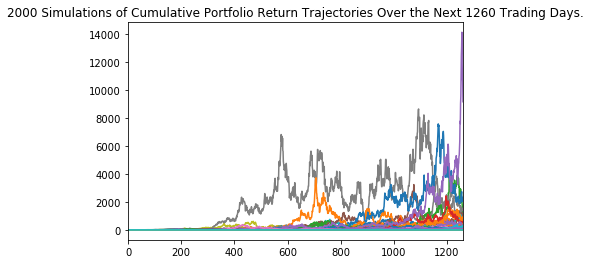

In [26]:
line_plot_cfund = MC_fiveyear_cfund.plot_simulation()

line_plot_cfund.get_figure().savefig("MC_fiveyear_cfund_plot.png", bbox_inches="tight")

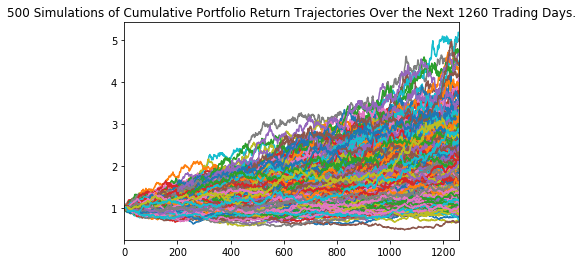

In [27]:
line_plot_cons = MC_fiveyear_cons.plot_simulation()

line_plot_cons.get_figure().savefig("MC_fiveyear_cons_plot.png", bbox_inches="tight")

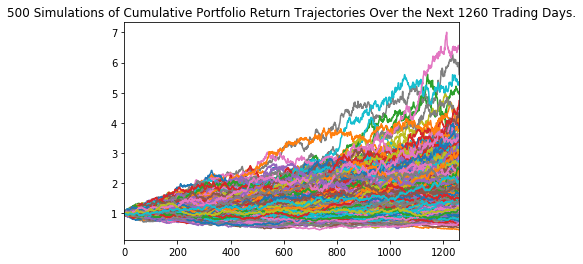

In [28]:
line_plot_med = MC_fiveyear_med.plot_simulation()

line_plot_med.get_figure().savefig("MC_fiveyear_med_plot.png", bbox_inches="tight")

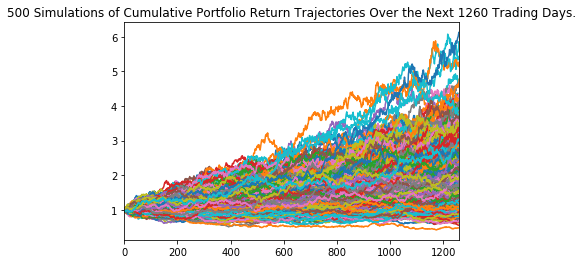

In [29]:
line_plot_risk = MC_fiveyear_risk.plot_simulation()

line_plot_risk.get_figure().savefig("MC_fiveyear_risk_plot.png", bbox_inches="tight")

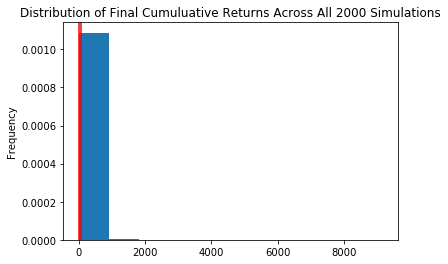

In [30]:
dist_plot_cfund = MC_fiveyear_cfund.plot_distribution()

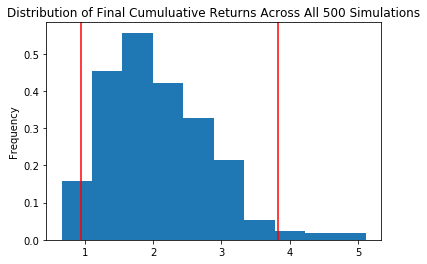

In [31]:
dist_plot_cons = MC_fiveyear_cons.plot_distribution()

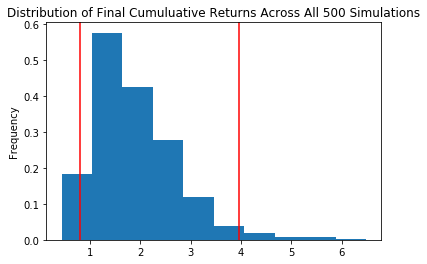

In [32]:
dist_plot_med = MC_fiveyear_med.plot_distribution()

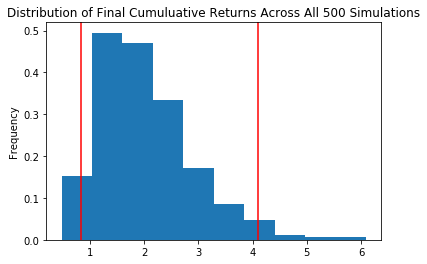

In [33]:
dist_plot_risk = MC_fiveyear_risk.plot_distribution()

In [34]:
summary_cfund = MC_fiveyear_cfund.summarize_cumulative_return()
summary_cons = MC_fiveyear_cons.summarize_cumulative_return()
summary_med = MC_fiveyear_med.summarize_cumulative_return()
summary_risk = MC_fiveyear_risk.summarize_cumulative_return()


In [55]:
print(summary_cfund)

count           2.000000e+03
mean            1.522881e+01
std             2.244888e+02
min             1.399999e-07
25%             5.745576e-03
50%             5.529693e-02
75%             7.087113e-01
max             9.160916e+03
95% CI Lower    4.276519e-05
95% CI Upper    6.230742e+01
Name: 1260, dtype: float64


In [36]:
print(summary_cons)

count           500.000000
mean              2.078599
std               0.774123
min               0.660752
25%               1.479930
50%               1.970777
75%               2.583072
max               5.114575
95% CI Lower      0.949466
95% CI Upper      3.829639
Name: 1260, dtype: float64


In [37]:
print(summary_med)

count           500.000000
mean              1.912756
std               0.829824
min               0.444931
25%               1.324998
50%               1.769561
75%               2.311019
max               6.476352
95% CI Lower      0.808274
95% CI Upper      3.963978
Name: 1260, dtype: float64


In [66]:
print(summary_risk)

count           500.000000
mean              2.010182
std               0.875531
min               0.473816
25%               1.400684
50%               1.836080
75%               2.434710
max               6.090128
95% CI Lower      0.831688
95% CI Upper      4.091263
Name: 1260, dtype: float64


In [68]:
cfund_mean = '152.3%'
cons_mean = '207.8%'
med_mean = '191.3%'
risk_mean = '201.1%'

In [39]:
cfund_lower = round(summary_cfund[5]*10000,2)
cfund_upper = round(summary_cfund[7]*10000,2)
cons_lower = round(summary_cons[5]*10000,2)
cons_upper = round(summary_cons[7]*10000,2)
med_lower = round(summary_med[5]*10000,2)
med_upper = round(summary_med[7]*10000,2)
risk_lower = round(summary_risk[5]*10000,2)
risk_upper = round(summary_risk[7]*10000,2)

In [40]:
print(f"There is a 95% chance that an initial investment of $10,000 in the C-Fund portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${cfund_lower} and ${cfund_upper}.")

There is a 95% chance that an initial investment of $10,000 in the C-Fund portfolio over the next 5 years will end within in the range of $552.97 and $91609162.54.


In [41]:
print(f"There is a 95% chance that an initial investment of $10,000 in our Conservative portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${cons_lower} and ${cons_upper}.")

There is a 95% chance that an initial investment of $10,000 in our Conservative portfolio over the next 5 years will end within in the range of $19707.77 and $51145.75.


In [42]:
print(f"There is a 95% chance that an initial investment of $10,000 in our Medium Risk portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${med_lower} and ${med_upper}.")

There is a 95% chance that an initial investment of $10,000 in our Medium Risk portfolio over the next 5 years will end within in the range of $17695.61 and $64763.52.


In [43]:
print(f"There is a 95% chance that an initial investment of $10,000 in our Risky portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${risk_lower} and ${risk_upper}.")

There is a 95% chance that an initial investment of $10,000 in our Risky portfolio over the next 5 years will end within in the range of $18360.8 and $60901.28.


In [65]:
# C-Fund
print("C-Fund")
print(f"There is a 95% chance that an initial investment of $10,000 in the C-Fund portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${cfund_lower} and ${cfund_upper}.")
print("*"*50)

# Our Conservative Fund
print("Conservative Fund")
print(f"There is a 95% chance that an initial investment of $10,000 in our Conservative portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${cons_lower} and ${cons_upper}.")
print("*"*50)

# Our Medium Risk Fund
print("Our Medium Risk Fund")
print(f"There is a 95% chance that an initial investment of $10,000 in our Medium Risk portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${med_lower} and ${med_upper}.")
print("*"*50)

# Our Risky Fund
print("Our Risky Fund")
print(f"There is a 95% chance that an initial investment of $10,000 in our Risky portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${risk_lower} and ${risk_upper}.")
print("*"*50)

C-Fund
There is a 95% chance that an initial investment of $10,000 in the C-Fund portfolio over the next 5 years will end within in the range of $552.97 and $91609162.54.
**************************************************
Conservative Fund
There is a 95% chance that an initial investment of $10,000 in our Conservative portfolio over the next 5 years will end within in the range of $19707.77 and $51145.75.
**************************************************
Our Medium Risk Fund
There is a 95% chance that an initial investment of $10,000 in our Medium Risk portfolio over the next 5 years will end within in the range of $17695.61 and $64763.52.
**************************************************
Our Risky Fund
There is a 95% chance that an initial investment of $10,000 in our Risky portfolio over the next 5 years will end within in the range of $18360.8 and $60901.28.
**************************************************


In [63]:
simulated_returns_cfund = {
    "mean": list(MC_fiveyear_cfund.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear_cfund.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear_cfund.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear_cfund.simulated_return.max(axis=1))
}

df_simulated_returns_cfund = pd.DataFrame(simulated_returns_cfund)

df_simulated_returns_cfund.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.003335,1.003353,0.689208,1.353900
2,1.004880,1.003211,0.611072,1.534760
3,1.007354,0.995252,0.562558,1.686546
4,1.007100,0.989182,0.521874,1.761974


In [46]:
simulated_returns_cons = {
    "mean": list(MC_fiveyear_cons.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear_cons.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear_cons.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear_cons.simulated_return.max(axis=1))
}

df_simulated_returns_cons = pd.DataFrame(simulated_returns_cons)

df_simulated_returns_cons.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001335,1.001134,0.972848,1.039353
2,1.001709,1.002576,0.959206,1.044632
3,1.001618,1.001655,0.951198,1.051165
4,1.001573,1.001548,0.930578,1.057207


In [47]:
simulated_returns_med = {
    "mean": list(MC_fiveyear_med.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear_med.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear_med.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear_med.simulated_return.max(axis=1))
}

df_simulated_returns_med = pd.DataFrame(simulated_returns_med)

df_simulated_returns_med.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999807,0.999466,0.966733,1.039760
2,0.999970,0.999627,0.943830,1.055909
3,1.000820,0.999895,0.930181,1.086776
4,1.000713,0.999442,0.924400,1.106736


In [48]:
simulated_returns_risk = {
    "mean": list(MC_fiveyear_risk.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear_risk.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear_risk.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear_risk.simulated_return.max(axis=1))
}

df_simulated_returns_risk = pd.DataFrame(simulated_returns_risk)

df_simulated_returns_med.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999807,0.999466,0.966733,1.039760
2,0.999970,0.999627,0.943830,1.055909
3,1.000820,0.999895,0.930181,1.086776
4,1.000713,0.999442,0.924400,1.106736


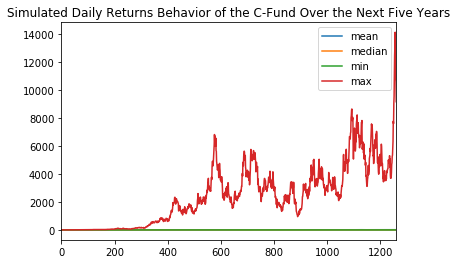

In [49]:
df_simulated_returns_cfund.plot(title="Simulated Daily Returns Behavior of the C-Fund Over the Next Five Years")

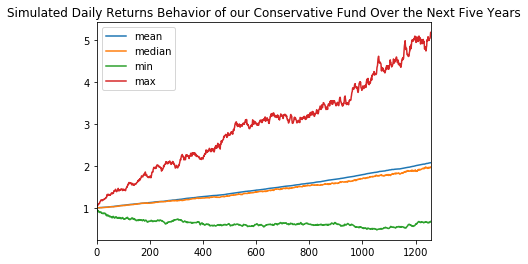

In [50]:
df_simulated_returns_cons.plot(title="Simulated Daily Returns Behavior of our Conservative Fund Over the Next Five Years")

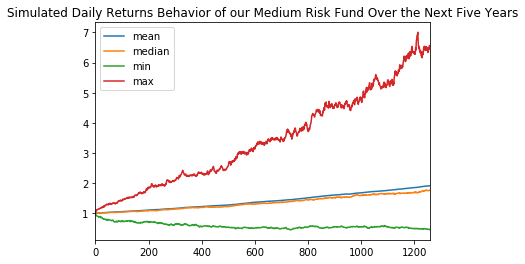

In [51]:
df_simulated_returns_med.plot(title="Simulated Daily Returns Behavior of our Medium Risk Fund Over the Next Five Years")

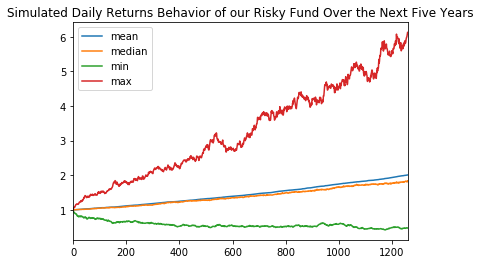

In [52]:
df_simulated_returns_risk.plot(title="Simulated Daily Returns Behavior of our Risky Fund Over the Next Five Years")

In [53]:
cfund_mean = round(summary_cfund[1]*10000,2)
cons_mean = round(summary_cons[1]*10000,2)
med_mean = round(summary_med[1]*10000,2)
risk_mean = round(summary_risk[1]*10000,2)

In [69]:
print("C-Fund")
print(f"Over the next five year period, the C-Fund has an expected mean return of"
      f" {cfund_mean}")
print("*"*50)

# Our Conservative Fund
print("Conservative Fund")
print(f"Over the next five year period, the Conservative fund has an expected mean return of"
      f" {cons_mean}")
print("*"*50)

# Our Medium Risk Fund
print("Our Medium Risk Fund")
print(f"Over the next five year period, the Medium Risk fund has an expected mean return of"
      f" {med_mean}")
print("*"*50)

# Our Risky Fund
print("Our Risky Fund")
print(f"Over the next five year period, the C-Fund has an expected mean return of"
      f" {risk_mean}")
print("*"*50)

C-Fund
Over the next five year period, the C-Fund has an expected mean return of 152.3%
**************************************************
Conservative Fund
There is a 95% chance that an initial investment of $10,000 in our Conservative portfolio $19707.77 and $51145.75.
**************************************************
Our Medium Risk Fund
There is a 95% chance that an initial investment of $10,000 in our Medium Risk portfolio $17695.61 and $64763.52.
**************************************************
Our Risky Fund
There is a 95% chance that an initial investment of $10,000 in our Risky portfolio $18360.8 and $60901.28.
**************************************************


In [ ]:
cfund_mean = '152.3%'
cons_mean = '207.8%'
med_mean = '191.3%'
risk_mean = '201.1%'